In [ ]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import random
import numpy as np
np.set_printoptions(suppress=True,   precision=20,  threshold=10,  linewidth=40)
pd.set_option('display.float_format',lambda x : '%.3f' % x)

In [47]:
origin=pd.read_csv("../datasets/adult500K.csv")
samples=pd.read_csv("../output/torch_cvae_adult500K_marital-status_ld150_id150_bs512_ep200_rate0.1_binary_gaussian15.csv")
# samples=pd.read_csv("./output/torch_cvae_adult500K_marital-status_ld150_id150_bs512_ep200_rate0.1_binary_gaussian15.csv")
# origin=origin[origin['income-bucket']==' >50K']
# samples=samples[samples['income-bucket']==' >50K']
group_col='marital-status'
# group_col='relationship'
# group_col='education-num'
# group_col='sex'
# group_col='income-bucket'
# group_col='occupation'
agg_col='age'
origin_groups=origin[group_col].value_counts().sort_index()
# o_nation.plot(kind='barh')
#plt.show()
samples_groups=samples[group_col].value_counts().sort_index()
#s_nation.plot(kind='barh')
#plt.show()
origin_groups
samples_groups
origin_res=origin.groupby(by=group_col).agg(age_sum=('age','sum'),age_mean=('age','mean'))
samples_res=samples.groupby(by=group_col).agg(age_sum=('age','sum'),age_mean=('age','mean'),rate=('rate','mean'))
# samples_res=samples.groupby(by=group_col, as_index=True).agg({agg_col:['sum','mean'],'rate':'mean'})
samples_res
samples_res['age_sum']=samples_res['age_sum']/samples_res['rate']
samples_res
del samples_res['rate']
diff=(samples_res-origin_res).abs()/origin_res
diff.fillna(1, inplace=True)
diff
print("total error:{}".format(diff.values.sum()/diff.size))
origin_res
samples_res

 Divorced                  68476
 Married-AF-spouse           361
 Married-civ-spouse       230391
 Married-spouse-absent      6342
 Never-married            163609
 Separated                 15685
 Widowed                   15136
Name: marital-status, dtype: int64

 Divorced                 7143
 Married-AF-spouse         361
 Married-civ-spouse       7143
 Married-spouse-absent    6342
 Never-married            7145
 Separated                7141
 Widowed                  7143
Name: marital-status, dtype: int64

,age_sum,age_mean,rate
marital-status,,,
Divorced,280168.210,39.223,0.104
Married-AF-spouse,13788.065,38.194,1.000
Married-civ-spouse,283230.515,39.651,0.031
Married-spouse-absent,251022.696,39.581,1.000
Never-married,282226.613,39.500,0.044
Separated,282386.915,39.544,0.455
Widowed,282385.618,39.533,0.472


,age_sum,age_mean,rate
marital-status,,,
Divorced,2685818.053,39.223,0.104
Married-AF-spouse,13788.065,38.194,1.000
Married-civ-spouse,9135343.913,39.651,0.031
Married-spouse-absent,251022.696,39.581,1.000
Never-married,6447324.593,39.500,0.044
Separated,620081.025,39.544,0.455
Widowed,598374.452,39.533,0.472


,age_sum,age_mean
marital-status,,
Divorced,0.017,0.017
Married-AF-spouse,0.041,0.041
Married-civ-spouse,0.028,0.028
Married-spouse-absent,0.023,0.023
Never-married,0.020,0.022
Separated,0.022,0.023
Widowed,0.026,0.026


total error:0.025625518474442482


,age_sum,age_mean
marital-status,,
Divorced,2639805,38.551
Married-AF-spouse,14379,39.831
Married-civ-spouse,8888659,38.581
Married-spouse-absent,245345,38.686
Never-married,6321128,38.636
Separated,606480,38.666
Widowed,583086,38.523


,age_sum,age_mean
marital-status,,
Divorced,2685818.053,39.223
Married-AF-spouse,13788.065,38.194
Married-civ-spouse,9135343.913,39.651
Married-spouse-absent,251022.696,39.581
Never-married,6447324.593,39.500
Separated,620081.025,39.544
Widowed,598374.452,39.533


----------------------------------group val: Divorced-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

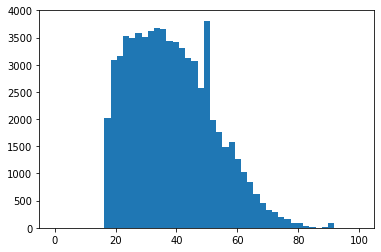

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

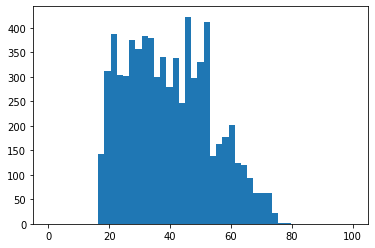

----------------------------------group val: Married-civ-spouse-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

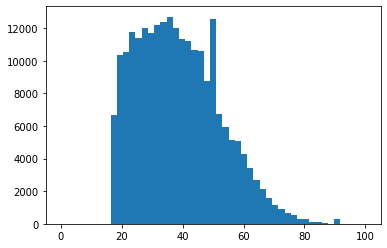

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

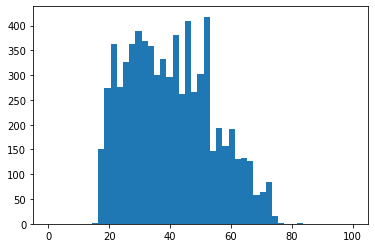

----------------------------------group val: Never-married-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

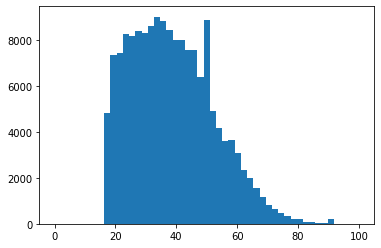

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

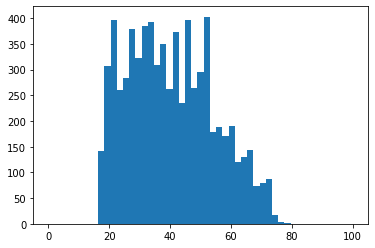

----------------------------------group val: Widowed-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

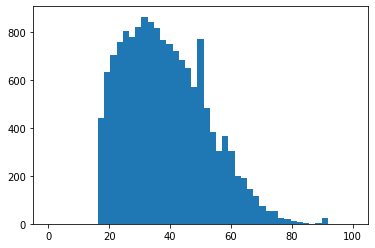

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

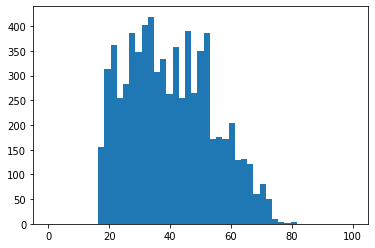

----------------------------------group val: Separated-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

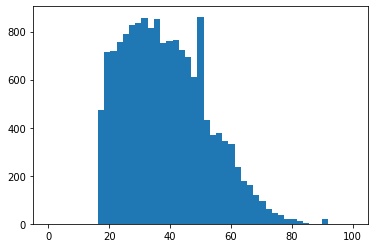

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

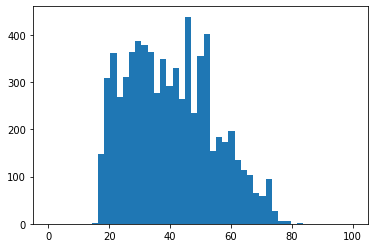

----------------------------------group val: Married-spouse-absent-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

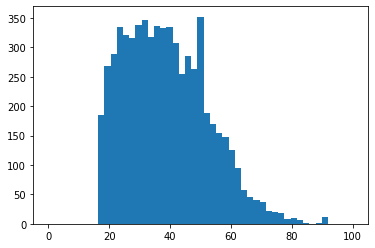

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

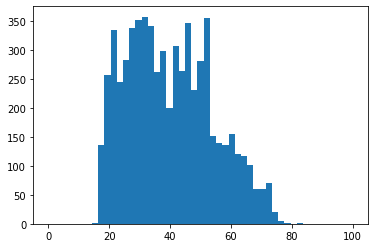

----------------------------------group val: Married-AF-spouse-------------------------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

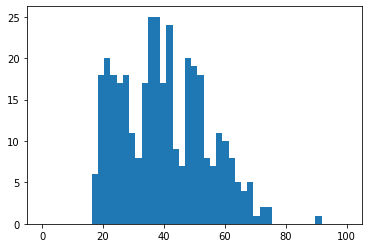

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  0.                ,
          2.0408163265306123,
          4.081632653061225 , ...,
         95.91836734693878  ,
         97.9591836734694   ,
        100.                ]),
 <BarContainer object of 49 artists>)

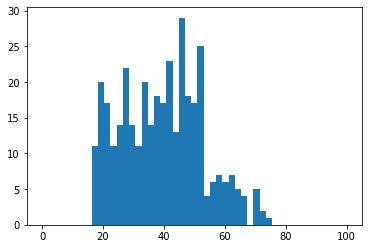

In [38]:
group_vals=origin[group_col].drop_duplicates(keep='first')
agg_range=(0,100)
bin_num=50
for val in group_vals: 
    print('----------------------------------group val:{}-------------------------------'.format(val))
    o_col=origin[origin[group_col]==val][agg_col]
    s_col=samples[samples[group_col]==val][agg_col]
    bins = np.linspace(agg_range[0], agg_range[1], bin_num)
    plt.hist(o_col.values.tolist(),bins)
    plt.show()
    plt.hist(s_col.values.tolist(),bins)
    plt.show()

In [ ]:
ad=pd.read_csv('../datasets/adult500K.csv')
ado=ad[:300000]
group_col='marital-status'
agg_col='age'
agg_range=(0,100)
bin_num=50
fb=pd.read_csv('../datasets/adult500K_second_batch.csv')
for val in group_vals: 
    print('----------------------------------group val:{}-------------------------------'.format(val))
    bins = np.linspace(agg_range[0], agg_range[1], bin_num)
    o_col=ad[ad[group_col]==val][agg_col]
    s_col=ado[ado[group_col]==val][agg_col]
    plt.hist(o_col.values.tolist(),bins)
    plt.show()
    plt.hist(s_col.values.tolist(),bins)
    plt.show()
    f_col=fb[fb[group_col]==val][agg_col]
    plt.hist(f_col.values.tolist(),bins)
    plt.show()

In [ ]:
num=3
d0=pd.read_csv('./d{}.csv'.format(num))
df0=pd.read_csv('./df{}.csv'.format(num))
diff0=pd.read_csv('./diff{}.csv'.format(num))
cols=['cagg_sum','cagg_mean','sagg_sum','sagg_mean']
bins=np.linspace(0,1,20)
for col in cols:
    cs0=d0[col]
    plt.hist(cs0.values.tolist(),bins)
    plt.show()
#     csf0=df0[col]
#     plt.hist(csf0.values.tolist(),bins)
#     plt.show()
    csff0=diff0[col]
    plt.hist(csff0.values.tolist(),bins)
    plt.show()